W0: -0.05000000000001294, W1: 0.0500000000000001, W2: 0.05000000000000032


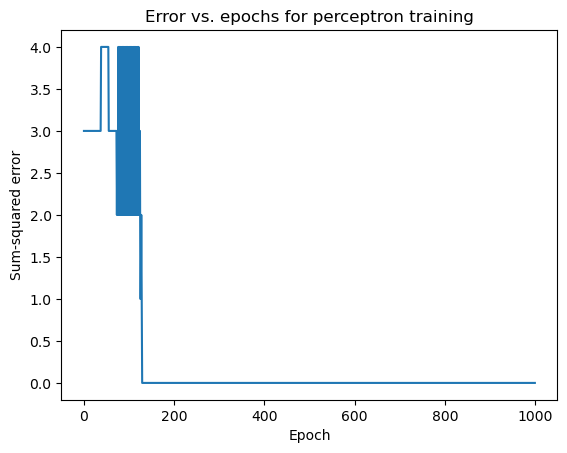

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
  if x >= 0:
    return 1
  else:
    return 0

# Initialize the weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Set the learning rate
alpha = 0.05

# Generate the training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Train the perceptron
errors = []
for i in range(1000):
  # Calculate the weighted sum
  z = W0 + np.sum(X * np.array([W1, W2]), axis=1)

  # Calculate the output
  output = np.array([step(val) for val in z])

  # Calculate the error
  error = y - output

  # Update the weights
  W0 += alpha * error.sum()
  W1 += alpha * np.dot(error, X[:, 0])
  W2 += alpha * np.dot(error, X[:, 1])

  # Calculate the sum-squared error
  sse = np.sum(error**2)
  errors.append(sse)

# Print the weights
print(f'W0: {W0}, W1: {W1}, W2: {W2}')

# Plot the epochs against the error values
plt.plot(range(1000), errors)
plt.xlabel('Epoch')
plt.ylabel('Sum-squared error')
plt.title('Error vs. epochs for perceptron training')
plt.show()

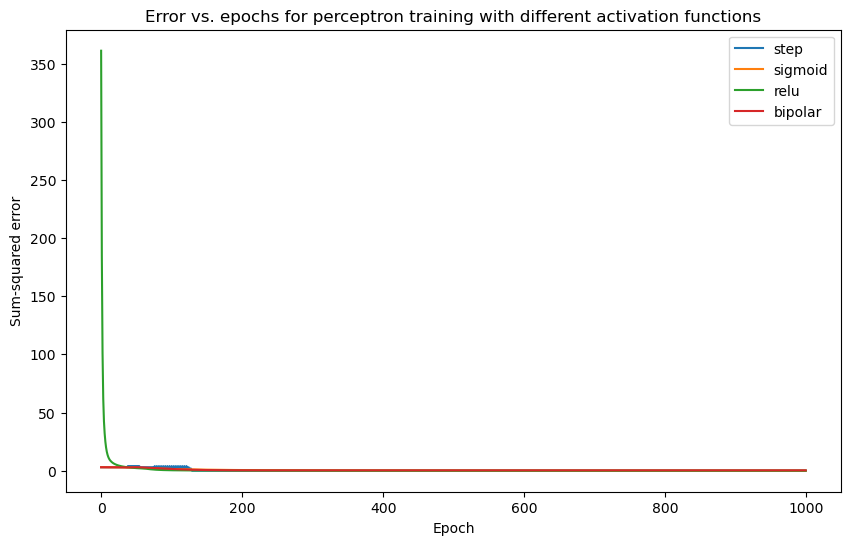

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
  return np.where(x >= 0, 1, 0)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

def bipolar(x):
  return 2 * sigmoid(x) - 1

# Initialize the weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Set the learning rate
alpha = 0.05

# Generate the training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Train the perceptron for different activation functions
errors = {}
for activation_fn in [step, sigmoid, relu, bipolar]:

  # Reset the weights
  W0 = 10
  W1 = 0.2
  W2 = -0.75

  # Train the perceptron
  activation_errors = []
  for i in range(1000):
    # Calculate the weighted sum
    z = W0 + np.sum(X * np.array([W1, W2]), axis=1)

    # Calculate the output
    output = activation_fn(z)

    # Calculate the error
    error = y - output

    # Update the weights
    W0 += alpha * error.sum()
    W1 += alpha * np.dot(error, X[:, 0])
    W2 += alpha * np.dot(error, X[:, 1])

    # Calculate the sum-squared error
    sse = np.sum(error**2)
    activation_errors.append(sse)

  # Add the errors to the dictionary
  errors[activation_fn.__name__] = activation_errors

# Plot the epochs against the error values for each activation function
plt.figure(figsize=(10, 6))
for activation_fn, activation_errors in errors.items():
  plt.plot(range(1000), activation_errors, label=activation_fn)

plt.xlabel('Epoch')
plt.ylabel('Sum-squared error')
plt.title('Error vs. epochs for perceptron training with different activation functions')
plt.legend()
plt.show()

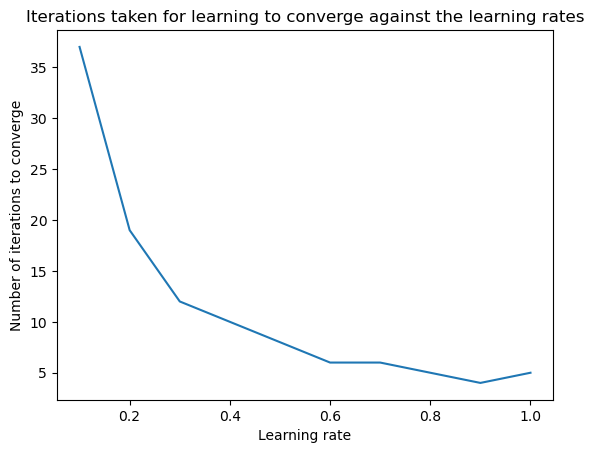

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
  if x >= 0:
    return 1
  else:
    return 0

# Initialize the weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Set the learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Train the perceptron for different learning rates
iterations = []
for learning_rate in learning_rates:

  # Reset the weights
  W0 = 10
  W1 = 0.2
  W2 = -0.75

  # Train the perceptron
  iteration_count = 0
  for i in range(1000):
    # Calculate the weighted sum
    z = W0 + np.sum(X * np.array([W1, W2]), axis=1)

    # Calculate the output
    output = np.array([step(val) for val in z])

    # Calculate the error
    error = y - output

    # Update the weights
    W0 += learning_rate * error.sum()
    W1 += learning_rate * np.dot(error, X[:, 0])
    W2 += learning_rate * np.dot(error, X[:, 1])

    # Increment the iteration count
    iteration_count += 1

    # If the perceptron has converged, stop training
    if np.sum(error) == 0:
      break

  # Add the number of iterations to the list
  iterations.append(iteration_count)

# Plot the number of iterations taken for learning to converge against the learning rates
plt.plot(learning_rates, iterations)
plt.xlabel('Learning rate')
plt.ylabel('Number of iterations to converge')
plt.title('Iterations taken for learning to converge against the learning rates')
plt.show()

Final Predictions:
[[0.11876335]
 [0.904714  ]
 [0.89748481]
 [0.0875222 ]]


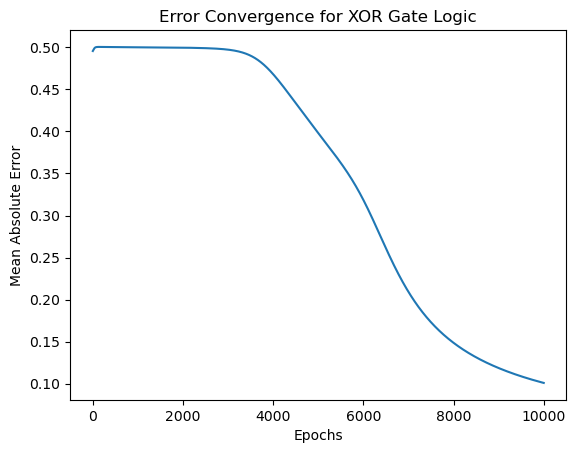

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize the weights randomly
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1

# Generate the training data for XOR gate logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XOR gate truth table

# Initialize weights with random values
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))

# Training the neural network
errors = []
for i in range(10000):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output
    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate

# Plot the error convergence
plt.plot(range(len(errors)), errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Error Convergence for XOR Gate Logic')

# Print final predictions
print("Final Predictions:")
print(output_layer_output)

plt.show()

W0: -0.169, W1: -1.655, W2: 13.621, W3: -1.476
Predictions: [1.00000000e+00 9.95309858e-01 1.00000000e+00 8.00553239e-10
 9.99991212e-01 6.66807254e-14 1.00000000e+00 1.00000000e+00
 1.52685203e-12 4.91041061e-03]


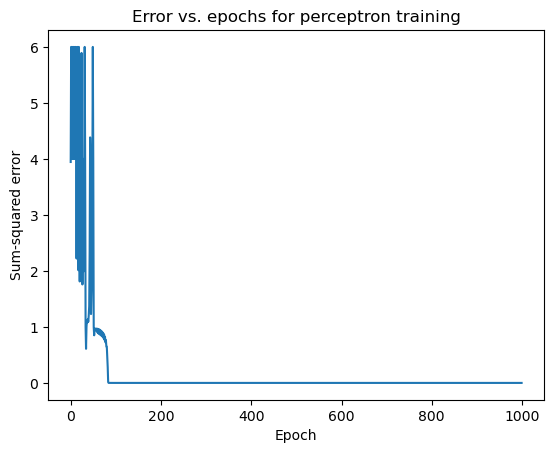

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the weights
W0 = 0.1
W1 = 0.2
W2 = -0.3
W3 = 0.4  # Additional weight for the fourth feature

# Set the learning rate
alpha = 0.05

# Load the customer data
customer_data = np.array([
    [20, 6, 2, 386, 1],  # High value (1)
    [16, 3, 6, 289, 1],  # High value (1)
    [27, 6, 2, 393, 1],  # High value (1)
    [19, 1, 2, 110, 0],  # Low value (0)
    [24, 4, 2, 280, 1],  # High value (1)
    [22, 1, 5, 168, 0],  # Low value (0)
    [15, 4, 2, 271, 1],  # High value (1)
    [18, 4, 2, 274, 1],  # High value (1)
    [21, 1, 4, 148, 0],  # Low value (0)
    [16, 2, 4, 198, 0],  # Low value (0)
])

# Extract the features and labels
X = customer_data[:, :-1]
y = customer_data[:, -1]

# Train the perceptron
errors = []
for i in range(1000):
    # Calculate the weighted sum
    z = W0 + np.sum(X * np.array([W1, W2, W3, 0]), axis=1)  # Add W3 for the fourth feature

    # Calculate the output
    output = sigmoid(z)

    # Calculate the error
    error = y - output

    # Update the weights
    W0 += alpha * error.sum()
    W1 += alpha * np.dot(error, X[:, 0])
    W2 += alpha * np.dot(error, X[:, 1])
    W3 += alpha * np.dot(error, X[:, 2])  # Update W3 for the fourth feature

    # Calculate the sum-squared error
    sse = np.sum(error**2)
    errors.append(sse)

# Print the weights
print(f'W0: {W0:.3f}, W1: {W1:.3f}, W2: {W2:.3f}, W3: {W3:.3f}')

# Evaluate the perceptron on the training data
predictions = sigmoid(W0 + np.sum(X * np.array([W1, W2, W3, 0]), axis=1))  # Add W3 for the fourth feature
print(f'Predictions: {predictions}')

# Plot the epochs against the error values
plt.plot(range(1000), errors)
plt.xlabel('Epoch')
plt.ylabel('Sum-squared error')
plt.title('Error vs. epochs for perceptron training')
plt.show()

Weights (Perceptron): [-452.59781454   71.35134838 -189.63714144   39.38836184]
Predictions (Perceptron): [1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
 1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
 0.00000000e+00 3.86497619e-26]
Weights (Matrix Pseudo-Inverse): [ 0.06498369  0.0590334   4.65190245  1.48192616 -0.07991221]
Predictions (Matrix Pseudo-Inverse): [0.78156411 0.68182097 0.75559021 0.50300738 0.66325372 0.5
 0.70385792 0.69063736 0.51431726 0.6031026 ]


C:\Users\akshi\AppData\Local\Temp\ipykernel_25268\3987508568.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


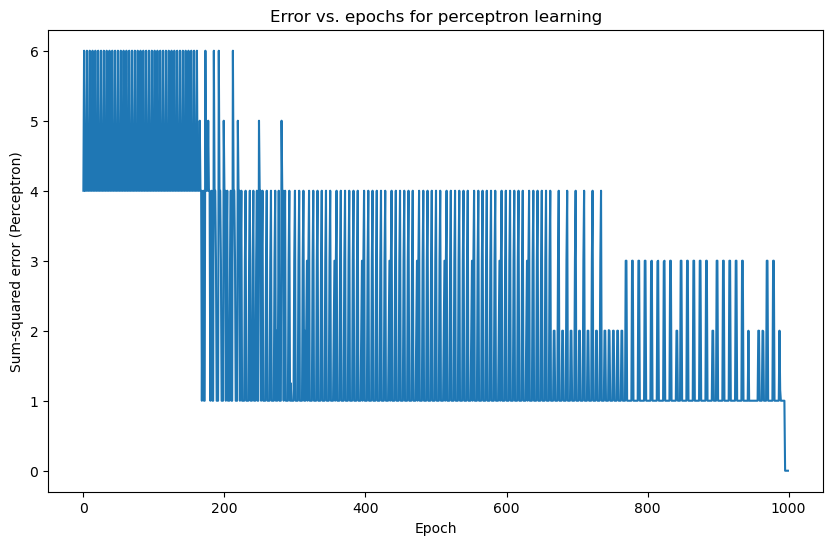

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the weights for perceptron learning
W_perceptron = np.array([0.1, 0.2, -0.3, 0.4])  # Four weights, including a bias term

# Set the learning rate for perceptron learning
alpha = 0.05

# Load the customer data
customer_data = np.array([
    [20, 6, 2, 386, 1],  # High value (1)
    [16, 3, 6, 289, 1],  # High value (1)
    [27, 6, 2, 393, 1],  # High value (1)
    [19, 1, 2, 110, 0],  # Low value (0)
    [24, 4, 2, 280, 1],  # High value (1)
    [22, 1, 5, 168, 0],  # Low value (0)
    [15, 4, 2, 271, 1],  # High value (1)
    [18, 4, 2, 274, 1],  # High value (1)
    [21, 1, 4, 148, 0],  # Low value (0)
    [16, 2, 4, 198, 0],  # Low value (0)
])

# Extract the features and labels
X = customer_data[:, :-1]
y = customer_data[:, -1]

# Train the perceptron
errors_perceptron = []
for i in range(1000):
    # Calculate the weighted sum for perceptron learning
    z_perceptron = np.dot(X, W_perceptron)

    # Calculate the output for perceptron learning
    output_perceptron = sigmoid(z_perceptron)

    # Calculate the error for perceptron learning
    error_perceptron = y - output_perceptron

    # Update the weights for perceptron learning
    W_perceptron += alpha * np.dot(error_perceptron, X)

    # Calculate the sum-squared error for perceptron learning
    sse_perceptron = np.sum(error_perceptron**2)
    errors_perceptron.append(sse_perceptron)

# Print the weights for perceptron learning
print(f'Weights (Perceptron): {W_perceptron}')

# Evaluate the perceptron on the training data
predictions_perceptron = sigmoid(np.dot(X, W_perceptron))
print(f'Predictions (Perceptron): {predictions_perceptron}')

# Calculate the matrix pseudo-inverse weights
# Add a column of ones for bias
X_with_bias = np.column_stack((np.ones(X.shape[0]), X))
weights_pseudo_inverse = np.linalg.pinv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

# Print the weights for matrix pseudo-inverse
print(f'Weights (Matrix Pseudo-Inverse): {weights_pseudo_inverse}')

# Calculate predictions using matrix pseudo-inverse
predictions_pseudo_inverse = sigmoid(np.dot(X_with_bias, weights_pseudo_inverse))
print(f'Predictions (Matrix Pseudo-Inverse): {predictions_pseudo_inverse}')

# Plot the epochs against the error values for perceptron learning
plt.figure(figsize=(10, 6))
plt.plot(range(1000), errors_perceptron)
plt.xlabel('Epoch')
plt.ylabel('Sum-squared error (Perceptron)')
plt.title('Error vs. epochs for perceptron learning')
plt.show()

fc1.weight: [[4.664914  4.672567 ]
 [2.0212514 2.022801 ]]
fc1.bias: [-1.3348657 -2.8899453]
fc2.weight: [[ 4.8172092 -4.3763285]]
fc2.bias: [-2.2480495]
Predictions: [[0.18621676]
 [0.75197935]
 [0.7520141 ]
 [0.31873313]]


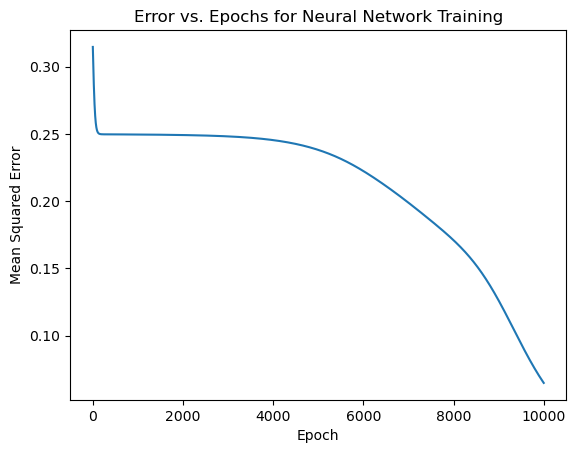

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a custom neural network class
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer
        self.fc2 = nn.Linear(2, 1)  # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize the model
model = XORModel()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Generate the training data
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Train the neural network
errors = []
for i in range(10000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())

# Print the learned weights and biases
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data.numpy()}')

# Evaluate the neural network on the training data
predictions = model(X).detach().numpy()
print(f'Predictions: {predictions}')

# Plot the epochs against the error values
plt.plot(range(len(errors)), errors)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Epochs for Neural Network Training')
plt.show()

W0: -0.049999999999972844, W1: -0.049999999999999684, W2: -0.049999999999999684


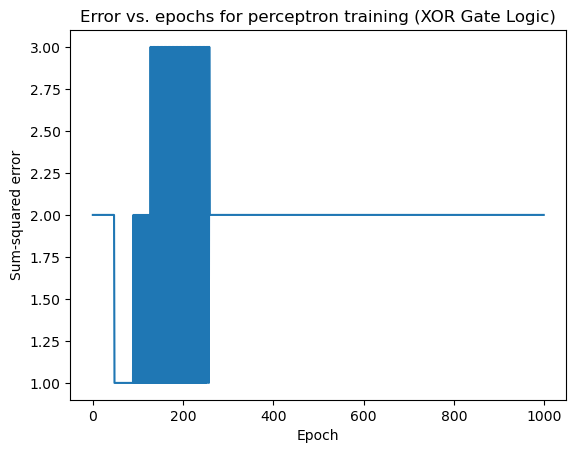

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

# Initialize the weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Set the learning rate
alpha = 0.05

# Generate the training data and XOR target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR truth table

# Train the perceptron
errors = []
for i in range(1000):
    # Calculate the weighted sum
    z = W0 + np.sum(X * np.array([W1, W2]), axis=1)

    # Calculate the output
    output = np.array([step(val) for val in z])

    # Calculate the error
    error = y_xor - output

    # Update the weights
    W0 += alpha * error.sum()
    W1 += alpha * np.dot(error, X[:, 0])
    W2 += alpha * np.dot(error, X[:, 1])

    # Calculate the sum-squared error
    sse = np.sum(error**2)
    errors.append(sse)

# Print the weights
print(f'W0: {W0}, W1: {W1}, W2: {W2}')

# Plot the epochs against the error values
plt.plot(range(1000), errors)
plt.xlabel('Epoch')
plt.ylabel('Sum-squared error')
plt.title('Error vs. epochs for perceptron training (XOR Gate Logic)')
plt.show()

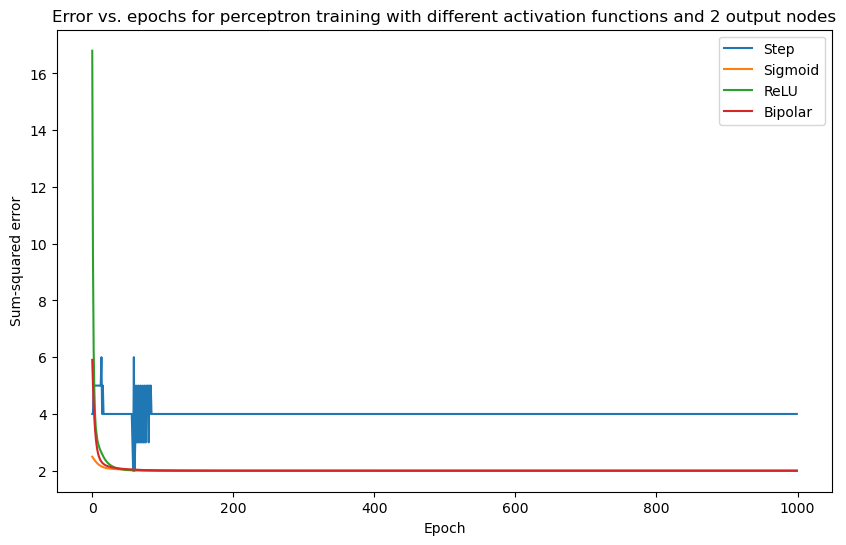

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def bipolar(x):
    return 2 * sigmoid(x) - 1

# Initialize the weights
W0 = np.random.randn(2)
W1 = np.random.randn(2, 2)
W2 = np.random.randn(2, 2)

# Set the learning rate
alpha = 0.05

# Generate the training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Define activation function names
activation_functions = ["Step", "Sigmoid", "ReLU", "Bipolar"]

# Train the perceptron for different activation functions
errors = {}
for activation_fn, activation_name in zip([step, sigmoid, relu, bipolar], activation_functions):

    # Reset the weights
    W0 = np.random.randn(2)
    W1 = np.random.randn(2, 2)
    W2 = np.random.randn(2, 2)

    # Train the perceptron
    activation_errors = []
    for i in range(1000):
        # Calculate the weighted sum
        z1 = X @ W1 + W0

        # Calculate the output
        output = activation_fn(z1)

        # Calculate the error
        error = y - output

        # Update the weights
        W0 += alpha * error.sum(axis=0)
        W1 += alpha * X.T @ error
        W2 += alpha * output.T @ error

        # Calculate the sum-squared error
        sse = np.sum(error**2)
        activation_errors.append(sse)

    # Add the errors to the dictionary
    errors[activation_name] = activation_errors

# Plot the epochs against the error values for each activation function
plt.figure(figsize=(10, 6))
for activation_name, activation_errors in errors.items():
    plt.plot(range(1000), activation_errors, label=activation_name)

plt.xlabel('Epoch')
plt.ylabel('Sum-squared error')
plt.title('Error vs. epochs for perceptron training with different activation functions and 2 output nodes')
plt.legend()
plt.show()

In [28]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the AND Gate and XOR Gate data
# Format: [input1, input2, output]
and_data = np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]])
xor_data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])

# Choose the dataset (AND or XOR)
dataset = xor_data  # Change to and_data for AND Gate

# Split the data into features (X) and labels (y)
X = dataset[:, :-1]
y = dataset[:, -1]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=42)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = mlp.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("MLP Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

MLP Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [1 0]]


C:\Users\akshi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the training and testing datasets from Excel files
training_data = pd.read_excel("training (2).xlsx")
testing_data = pd.read_excel("testing (2).xlsx")

# Convert the "Equation" column into a numerical feature (character count)
training_data["input_Num"] = training_data["input"].str.len()
testing_data["Equation_Num"] = testing_data["Equation"].str.len()

# Ensure that both datasets have the same columns
common_columns = set(training_data.columns).intersection(testing_data.columns)
training_data = training_data[list(common_columns)]
testing_data = testing_data[list(common_columns)]

# Prepare the training data and labels
X_train = training_data.drop(columns=["Classification"])
y_train = training_data["Classification"]

# Prepare the testing data and labels
X_test = testing_data.drop(columns=["Classification"])
y_test = testing_data["Classification"]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the MLPClassifier with desired parameters
clf = MLPClassifier(hidden_layer_sizes=(5, 2), solver='lbfgs', alpha=1e-5, random_state=1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("MLP Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

MLP Accuracy: 1.0
Confusion Matrix:
[[43  0]
 [ 0 27]]
